In [ ]:
# Project Part 2 - Stereo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted
from glob import glob
from tqdm.notebook import tqdm


In [ ]:
left_files = natsorted(glob('/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/left_imgs/*.png'))
right_files = natsorted(glob('/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/right_imgs/*.png'))
disp_files = natsorted(glob('/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/*.png'))

In [14]:
rmse_sum = 0

# block size, max disparity, speckle Window, uniqueness ratio
arr_vals=[(47, 256, 100, 15), #image 0
          (5,  80,  300, 15), #image 1
          (47, 176, 200, 10), #image 2
          (7,  96,  300, 15), #image 3
          (47, 160, 200, 10)] #image 4

for left_file,right_file,disp_file,val in zip(left_files,right_files,disp_files,arr_vals):
    print(disp_file)
    block_size,max_disparity,speck,rat = val

    left_img = cv2.imread(left_file,0)
    right_img = cv2.imread(right_file,0)
    disp_gt_img = cv2.imread(disp_file,0).astype(np.float32)

    # SGBM parameters
    sgbm = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=max_disparity,
        blockSize=block_size,
        P1=8 * 1 * block_size * block_size,
        P2=32 * 1 * block_size * block_size,
        disp12MaxDiff=1,
        uniquenessRatio=rat,
        speckleWindowSize=speck,
        speckleRange=32,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
    )

    # Compute disparity
    disparity = sgbm.compute(left_img, right_img)
    disparity = cv2.normalize(disparity, None, alpha=0, beta=max_disparity, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # error
    mask = np.logical_or(disparity==0,disp_gt_img==0)
    masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img),mask=mask)
    rmse_tmp = np.sqrt(masked_sq_err.mean())

    # sum
    rmse_sum += rmse_tmp
    print(val,rmse_tmp)

# print final result
print("")
print("avg rmse = " + str(rmse_sum / len(left_files)) + " pixels")

/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000000_10.png
(47, 256, 100, 15) 1.6398656166657852
/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000001_10.png
(5, 80, 300, 15) 2.731072113446136
/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000002_10.png
(47, 176, 200, 10) 2.338968233016063
/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000003_10.png
(7, 96, 300, 15) 5.086173942075114
/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000004_10.png
(47, 160, 200, 10) 4.120372303831952

avg rmse = 3.18329044180701 pixels


In [5]:
def display_imgs(img1, img2):
    plt.imshow(img1)
    plt.show()
    plt.imshow(img2)
    plt.show()
    return None

/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000000_10.png


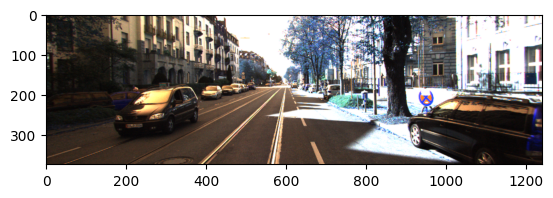

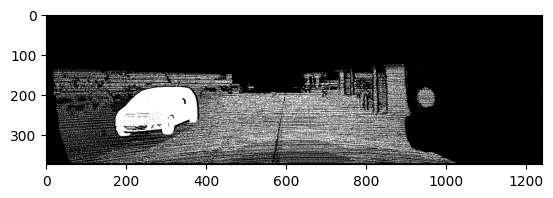

/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000001_10.png


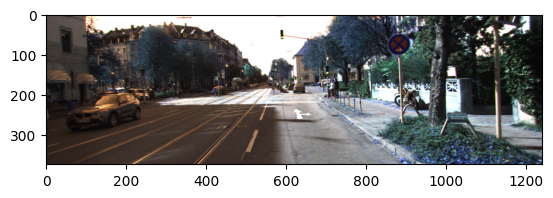

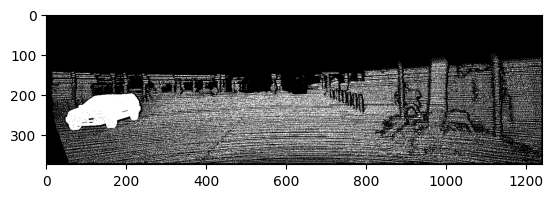

/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000002_10.png


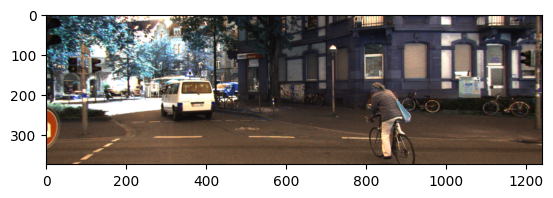

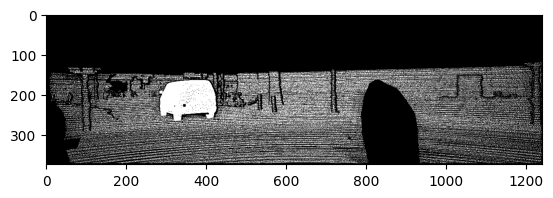

/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000003_10.png


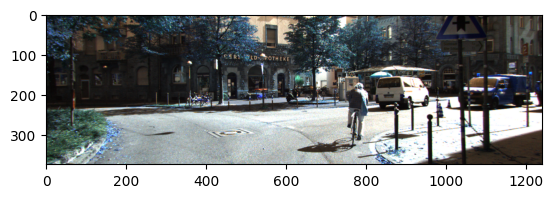

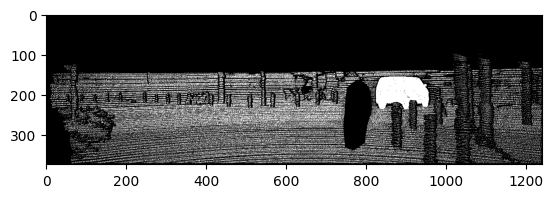

/content/gdrive/MyDrive/Colab Notebooks/188/stage2_stereo/disparities/000004_10.png


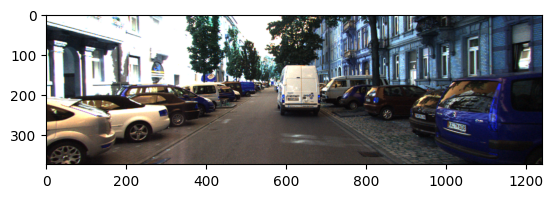

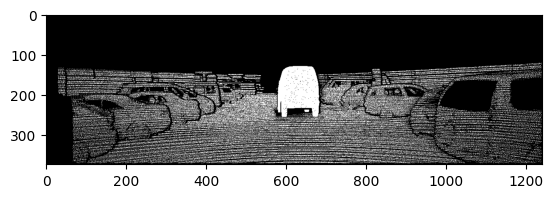

In [8]:
for left_file,right_file,disp_file,val in zip(left_files,right_files,disp_files,arr_vals):
    print(disp_file)
    block_size,max_disparity,speck,rat = val

    left_img = cv2.imread(left_file)
    right_img = cv2.imread(right_file,0)
    disp_gt_img = cv2.imread(disp_file).astype(np.float32)

    display_imgs(left_img,disp_gt_img)
